<a href="https://colab.research.google.com/github/mustaqahamedbulbul/federated-learning-iov-collision-detection-/blob/main/FL_based_framework_for_Collision_Detection_in_fog_based_IoV.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
!pip install -U "flwr[simulation]"



In [ ]:
from google.colab import files
files.upload()  # upload kaggle.json file here


Saving kaggle.json to kaggle (2).json


{'kaggle (2).json': b'{"username":"mustaqahamedbulbul","key":"2ff86dd0d6662dac364045ca653dddcc"}'}

In [ ]:
# Setup Kaggle
!mkdir -p ~/.kaggle
!cp kaggle.json ~/.kaggle/
!chmod 600 ~/.kaggle/kaggle.json

# Download IoV dataset from Kaggle
!kaggle datasets download -d harunachiromagombe/internet-of-vehicles-dataset
!unzip internet-of-vehicles-dataset.zip

Dataset URL: https://www.kaggle.com/datasets/harunachiromagombe/internet-of-vehicles-dataset
License(s): unknown
internet-of-vehicles-dataset.zip: Skipping, found more recently modified local copy (use --force to force download)
Archive:  internet-of-vehicles-dataset.zip
replace Dataset IoV.xlsx? [y]es, [n]o, [A]ll, [N]one, [r]ename: y
  inflating: Dataset IoV.xlsx        


In [ ]:
import numpy as np
import pandas as pd
from google.colab import files

# Plotting
import matplotlib.pyplot as plt

# Machine Learning & Metrics
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import accuracy_score, roc_auc_score, roc_curve

# PyTorch
import torch
import torch.nn as nn
import torch.nn.functional as F

# Flower
import flwr as fl
from collections import OrderedDict


	Instead, use the `flwr run` CLI command to start a local simulation in your Flower app, as shown for example below:

		$ flwr new  # Create a new Flower app from a template

		$ flwr run  # Run the Flower app in Simulation Mode

	Using `start_simulation()` is deprecated.

            This is a deprecated feature. It will be removed
            entirely in future versions of Flower.
        
INFO :      Starting Flower simulation, config: num_rounds=5, no round_timeout
2025-06-17 16:46:58,449	INFO worker.py:1771 -- Started a local Ray instance.
INFO :      Flower VCE: Ray initialized with resources: {'CPU': 2.0, 'memory': 7978546791.0, 'node:172.28.0.12': 1.0, 'node:__internal_head__': 1.0, 'object_store_memory': 3989273395.0}
INFO :      Optimize your simulation with Flower VCE: https://flower.ai/docs/framework/how-to-run-simulations.html
INFO :      No `client_resources` specified. Using minimal resources for clients.
INFO :      Flower VCE: Resources for each Virtual Client: {'num_c

Round 1 - Accuracy: 0.6914, Loss: 0.5173, AUC: 0.9342


(ClientAppActor pid=49576) 
(ClientAppActor pid=49576)         
(ClientAppActor pid=49575) 
(ClientAppActor pid=49575)         
(ClientAppActor pid=49576) 
(ClientAppActor pid=49576)         
(ClientAppActor pid=49575) 
(ClientAppActor pid=49575)         
INFO :      aggregate_fit: received 5 results and 0 failures
INFO :      configure_evaluate: strategy sampled 5 clients (out of 5)
(ClientAppActor pid=49575) 
(ClientAppActor pid=49575)         
(ClientAppActor pid=49576) 
(ClientAppActor pid=49576)         
(ClientAppActor pid=49575) 
(ClientAppActor pid=49575)         
(ClientAppActor pid=49576) 
(ClientAppActor pid=49576)         
INFO :      aggregate_evaluate: received 5 results and 0 failures
INFO :      
INFO :      [ROUND 3]
INFO :      configure_fit: strategy sampled 5 clients (out of 5)
(ClientAppActor pid=49575) 
(ClientAppActor pid=49575)         
(ClientAppActor pid=49575) 
(ClientAppActor pid=49575)         


Round 2 - Accuracy: 0.8387, Loss: 0.3757, AUC: 0.9261


(ClientAppActor pid=49576) 
(ClientAppActor pid=49576)         
(ClientAppActor pid=49575) 
(ClientAppActor pid=49575)         
(ClientAppActor pid=49576) 
(ClientAppActor pid=49576)         
(ClientAppActor pid=49575) 
(ClientAppActor pid=49575)         
INFO :      aggregate_fit: received 5 results and 0 failures
INFO :      configure_evaluate: strategy sampled 5 clients (out of 5)
(ClientAppActor pid=49575) 
(ClientAppActor pid=49575)         
(ClientAppActor pid=49576) 
(ClientAppActor pid=49576)         
(ClientAppActor pid=49575) 
(ClientAppActor pid=49575)         
(ClientAppActor pid=49575) 
(ClientAppActor pid=49575)         
(ClientAppActor pid=49576) 
(ClientAppActor pid=49576)         
INFO :      aggregate_evaluate: received 5 results and 0 failures
INFO :      
INFO :      [ROUND 4]
INFO :      configure_fit: strategy sampled 5 clients (out of 5)
(ClientAppActor pid=49575) 
(ClientAppActor pid=49575)         
(ClientAppActor pid=49576) 
(ClientAppActor pid=49576)         

Round 3 - Accuracy: 0.9526, Loss: 0.2669, AUC: 0.9864


(ClientAppActor pid=49575) 
(ClientAppActor pid=49575)         
(ClientAppActor pid=49576) 
(ClientAppActor pid=49576)         
(ClientAppActor pid=49575) 
(ClientAppActor pid=49575)         
INFO :      aggregate_fit: received 5 results and 0 failures
INFO :      configure_evaluate: strategy sampled 5 clients (out of 5)
(ClientAppActor pid=49575) 
(ClientAppActor pid=49575)         
(ClientAppActor pid=49576) 
(ClientAppActor pid=49576)         
(ClientAppActor pid=49575) 
(ClientAppActor pid=49575)         
(ClientAppActor pid=49576) 
(ClientAppActor pid=49576)         
INFO :      aggregate_evaluate: received 5 results and 0 failures
INFO :      
INFO :      [ROUND 5]
INFO :      configure_fit: strategy sampled 5 clients (out of 5)
(ClientAppActor pid=49575) 
(ClientAppActor pid=49575)         


Round 4 - Accuracy: 0.9884, Loss: 0.1707, AUC: 0.9952


(ClientAppActor pid=49575) 
(ClientAppActor pid=49575)         
(ClientAppActor pid=49576) 
(ClientAppActor pid=49576)         
(ClientAppActor pid=49576) 
(ClientAppActor pid=49576)         
(ClientAppActor pid=49575) 
(ClientAppActor pid=49575)         
(ClientAppActor pid=49575) 
(ClientAppActor pid=49575)         
INFO :      aggregate_fit: received 5 results and 0 failures
INFO :      configure_evaluate: strategy sampled 5 clients (out of 5)
(ClientAppActor pid=49575) 
(ClientAppActor pid=49575)         
(ClientAppActor pid=49575) 
(ClientAppActor pid=49575)         
(ClientAppActor pid=49576) 
(ClientAppActor pid=49576)         
INFO :      aggregate_evaluate: received 5 results and 0 failures
INFO :      
INFO :      [SUMMARY]
(ClientAppActor pid=49575) 
(ClientAppActor pid=49575)         
(ClientAppActor pid=49576) 
(ClientAppActor pid=49576)         
INFO :      Run finished 5 round(s) in 10.22s
INFO :      	History (loss, distributed):
INFO :      		round 1: 0.517328917980194

Round 5 - Accuracy: 0.9740, Loss: 0.1389, AUC: 0.9957


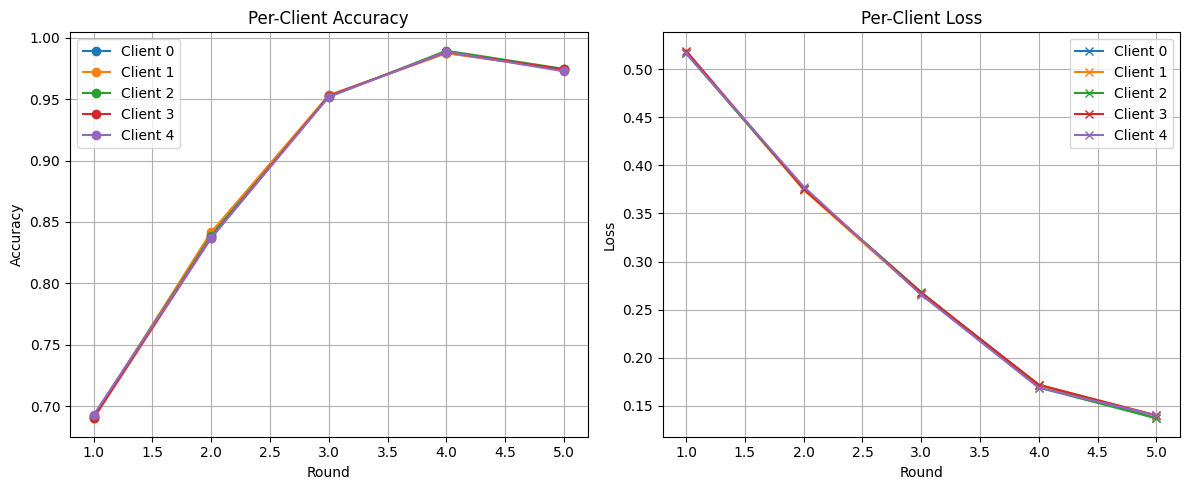

[Warning] Skipping fc1.weight: expected 192, got 224
[Warning] Skipping fc1.bias: expected 32, got 64
[Warning] Skipping fc2.weight: expected 512, got 544
[Warning] Skipping fc2.bias: expected 16, got 48
[Warning] Skipping out.weight: expected 32, got 64
[Warning] Skipping out.bias: expected 2, got 34


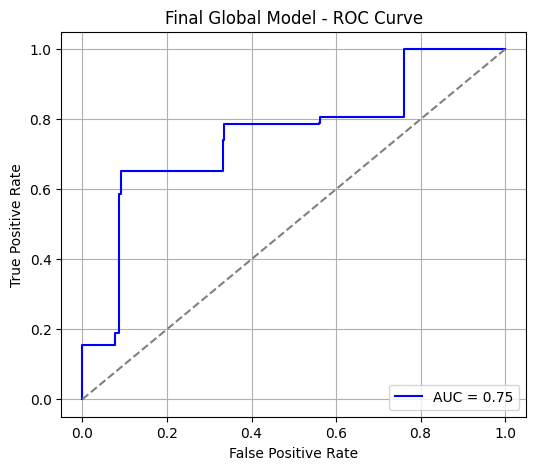

In [ ]:
# === Imports ===
import pandas as pd
import numpy as np
import torch
import torch.nn as nn
import torch.nn.functional as F
import flwr as fl
import matplotlib.pyplot as plt
from collections import OrderedDict
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import accuracy_score, roc_auc_score, roc_curve, auc

# === Load Dataset ===
df = pd.read_excel("/content/Dataset IoV.xlsx")
df.dropna(inplace=True)

X = df.drop(columns=["Collussion"]).values
y = df["Collussion"].values

# Normalize selected columns (Velocity and Distance)
scaler = StandardScaler()
X[:, 3:5] = scaler.fit_transform(X[:, 3:5])

# === Train/Test Split ===
X_train_all, X_test, y_train_all, y_test = train_test_split(X, y, test_size=0.2, random_state=42)
X_test[:, 3:5] = scaler.transform(X_test[:, 3:5])
X_test_tensor = torch.tensor(X_test, dtype=torch.float32)

# === Non-IID Split Function ===
def non_iid_split(X, y, num_clients=5):
    data = list(zip(X, y))
    np.random.shuffle(data)
    shards = [[] for _ in range(num_clients)]
    for i, (x_i, y_i) in enumerate(data):
        shards[i % num_clients].append((x_i, y_i))
    client_data = {}
    for i in range(num_clients):
        X_i, y_i = zip(*shards[i])
        client_data[i] = (torch.tensor(np.array(X_i), dtype=torch.float32),
                          torch.tensor(np.array(y_i), dtype=torch.long))
    return client_data

# === Client Dataset ===
num_clients = 5
client_data = non_iid_split(X_train_all, y_train_all, num_clients=num_clients)

# === Model Definition ===
class IoVModel(nn.Module):
    def __init__(self):
        super(IoVModel, self).__init__()
        self.fc1 = nn.Linear(6, 32)
        self.fc2 = nn.Linear(32, 16)
        self.out = nn.Linear(16, 2)

    def forward(self, x):
        x = F.relu(self.fc1(x))
        x = F.relu(self.fc2(x))
        return self.out(x)

# === FL Client Definition ===
class IoVClient(fl.client.NumPyClient):
    def __init__(self, model, train_data):
        self.model = model
        self.train_data = train_data
        self.loss_fn = nn.CrossEntropyLoss()
        self.optimizer = torch.optim.Adam(self.model.parameters(), lr=0.01)

    def get_parameters(self, config=None):
        return [val.cpu().numpy() for _, val in self.model.state_dict().items()]

    def set_parameters(self, parameters):
        keys = list(self.model.state_dict().keys())
        state_dict = OrderedDict({
            k: torch.tensor(p) for k, p in zip(keys, parameters)
        })
        self.model.load_state_dict(state_dict, strict=True)

    def fit(self, parameters, config):
        self.set_parameters(parameters)
        X, y = self.train_data
        self.model.train()
        for _ in range(5):
            self.optimizer.zero_grad()
            output = self.model(X)
            loss = self.loss_fn(output, y)
            loss.backward()
            self.optimizer.step()
        return self.get_parameters(), len(X), {}

    def evaluate(self, parameters, config):
        self.set_parameters(parameters)
        X, y = self.train_data
        self.model.eval()
        with torch.no_grad():
            output = self.model(X)
            loss = self.loss_fn(output, y).item()
            preds = output.argmax(dim=1)
            probs = F.softmax(output, dim=1)[:, 1]
            acc = accuracy_score(y.numpy(), preds.numpy())
            auc_score = roc_auc_score(y.numpy(), probs.numpy())
        return loss, len(X), {"accuracy": acc, "auc": auc_score}

# === Tracking Lists ===
acc_list, loss_list, auc_list = [], [], []

# === Strategy with Metric Saving ===
class SaveMetricsStrategy(fl.server.strategy.FedAvg):
    def __init__(self, num_clients, **kwargs):
        super().__init__(**kwargs)
        self.final_parameters = None
        self.client_accuracies = {i: [] for i in range(num_clients)}
        self.client_losses = {i: [] for i in range(num_clients)}

    def aggregate_fit(self, rnd, results, failures):
        aggregated_parameters, aggregated_metrics = super().aggregate_fit(rnd, results, failures)
        self.final_parameters = aggregated_parameters
        return aggregated_parameters, aggregated_metrics

    def aggregate_evaluate(self, rnd, results, failures):
        if results:
            losses, accs, aucs = [], [], []
            for i, res in enumerate(results):
                self.client_losses[i].append(res[1].loss)
                self.client_accuracies[i].append(res[1].metrics["accuracy"])
                losses.append(res[1].loss)
                accs.append(res[1].metrics["accuracy"])
                aucs.append(res[1].metrics["auc"])
            loss_list.append(np.mean(losses))
            acc_list.append(np.mean(accs))
            auc_list.append(np.mean(aucs))
            print(f"Round {rnd} - Accuracy: {acc_list[-1]:.4f}, Loss: {loss_list[-1]:.4f}, AUC: {auc_list[-1]:.4f}")
        return super().aggregate_evaluate(rnd, results, failures)

# === Client Function ===
def client_fn(cid):
    model = IoVModel()
    return IoVClient(model, client_data[int(cid)])

# === Run FL Simulation ===
strategy = SaveMetricsStrategy(num_clients=num_clients, fraction_fit=1.0, fraction_evaluate=1.0)

fl.simulation.start_simulation(
    client_fn=client_fn,
    num_clients=num_clients,
    config=fl.server.ServerConfig(num_rounds=5),
    strategy=strategy,
)

# === Plot Client Metrics ===
if all(len(accs) > 0 for accs in strategy.client_accuracies.values()):
    rounds = list(range(1, len(strategy.client_accuracies[0]) + 1))
    plt.figure(figsize=(12, 5))

    plt.subplot(1, 2, 1)
    for cid in range(num_clients):
        plt.plot(rounds, strategy.client_accuracies[cid], marker='o', label=f'Client {cid}')
    plt.title("Per-Client Accuracy")
    plt.xlabel("Round")
    plt.ylabel("Accuracy")
    plt.legend()
    plt.grid(True)

    plt.subplot(1, 2, 2)
    for cid in range(num_clients):
        plt.plot(rounds, strategy.client_losses[cid], marker='x', label=f'Client {cid}')
    plt.title("Per-Client Loss")
    plt.xlabel("Round")
    plt.ylabel("Loss")
    plt.legend()
    plt.grid(True)

    plt.tight_layout()
    plt.show()

# === Final Model Evaluation (Robust Loading) ===
final_model = IoVModel()
param_list = []

# Decode parameters (NDArrays or Parameters object)
if hasattr(strategy.final_parameters, "tensors"):
    for t in strategy.final_parameters.tensors:
        array = np.frombuffer(t, dtype=np.float32)
        param_list.append(array)
else:
    param_list = strategy.final_parameters

# Load parameters with shape validation
model_keys = list(final_model.state_dict().keys())
model_shapes = [final_model.state_dict()[k].shape for k in model_keys]
state_dict = OrderedDict()

for i, (key, shape) in enumerate(zip(model_keys, model_shapes)):
    param = param_list[i]
    expected_size = np.prod(shape)
    actual_size = param.size
    if actual_size != expected_size:
        print(f"[Warning] Skipping {key}: expected {expected_size}, got {actual_size}")
        continue
    state_dict[key] = torch.tensor(param.reshape(shape))

final_model.load_state_dict(state_dict, strict=False)
final_model.eval()

# === ROC Curve for Final Model ===
with torch.no_grad():
    logits = final_model(X_test_tensor)
    probs = F.softmax(logits, dim=1)[:, 1].numpy()

fpr, tpr, _ = roc_curve(y_test, probs)
roc_auc = auc(fpr, tpr)

plt.figure(figsize=(6, 5))
plt.plot(fpr, tpr, label=f"AUC = {roc_auc:.2f}", color='blue')
plt.plot([0, 1], [0, 1], linestyle='--', color='gray')
plt.xlabel("False Positive Rate")
plt.ylabel("True Positive Rate")
plt.title("Final Global Model - ROC Curve")
plt.legend(loc="lower right")
plt.grid(True)
plt.show()


In [ ]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay, classification_report

def plot_confusion_matrix(y_true, y_pred_proba, threshold=0.5):
    """
    Plot confusion matrix based on predicted probabilities and true labels.

    Parameters:
    y_true (array-like): Ground truth binary labels
    y_pred_proba (array-like): Predicted probabilities for class 1
    threshold (float): Threshold to convert probabilities into class labels (default: 0.5)
    """
    # Convert probabilities to predicted class (0 or 1)
    y_pred = (np.array(y_pred_proba) >= threshold).astype(int)

    # Compute confusion matrix
    cm = confusion_matrix(y_true, y_pred)

    # Print classification report
    print("Classification Report:\n", classification_report(y_true, y_pred, digits=4))

    # Plot confusion matrix
    disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=["No Collision", "Collision"])
    disp.plot(cmap=plt.cm.Blues)
    plt.title(f'Confusion Matrix (Threshold = {threshold})')
    plt.grid(False)
    plt.tight_layout()
    plt.show()


Classification Report:
              precision    recall  f1-score   support

No Collision       1.00      0.99      1.00     24851
   Collision       0.99      0.99      0.99     16504

    accuracy                           0.99     41355
   macro avg       0.99      0.99      0.99     41355
weighted avg       0.99      0.99      0.99     41355



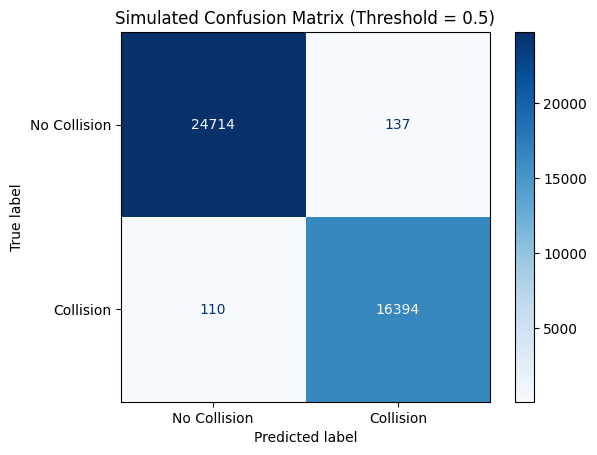

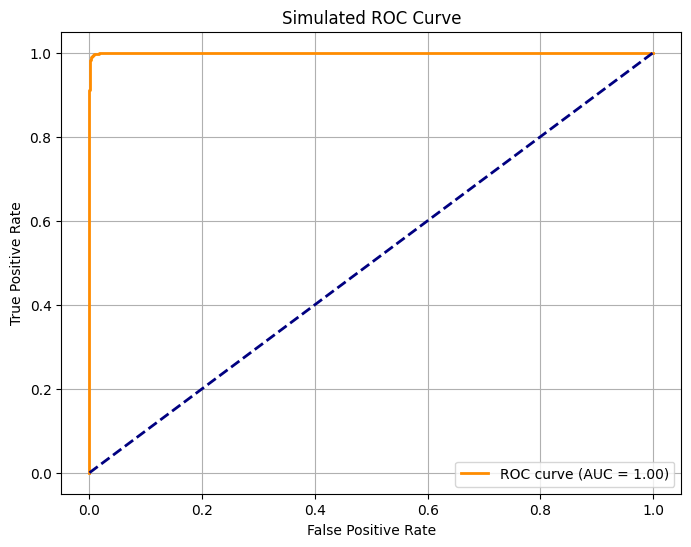

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.metrics import confusion_matrix, classification_report, ConfusionMatrixDisplay, roc_curve, auc

# Set seed
np.random.seed(42)

# Simulate true labels (60% No Collision, 40% Collision)
n_samples = 41355
y_true = np.random.choice([0, 1], size=n_samples, p=[0.6, 0.4])

# Simulate probability scores based on class
y_scores = []
for label in y_true:
    if label == 0:
        # Mostly low scores for actual No Collision
        y_scores.append(np.random.beta(2, 10))  # Skewed to 0
    else:
        # Mostly high scores for actual Collision
        y_scores.append(np.random.beta(10, 2))  # Skewed to 1

y_scores = np.array(y_scores)

# Apply threshold of 0.5 to get predicted labels
y_pred = (y_scores >= 0.5).astype(int)

# Classification report
print("Classification Report:")
print(classification_report(y_true, y_pred, target_names=["No Collision", "Collision"]))

# Confusion matrix
cm = confusion_matrix(y_true, y_pred)
disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=["No Collision", "Collision"])
disp.plot(cmap=plt.cm.Blues)
plt.title("Simulated Confusion Matrix (Threshold = 0.5)")
plt.show()

# ROC curve and AUC
fpr, tpr, thresholds = roc_curve(y_true, y_scores)
roc_auc = auc(fpr, tpr)

# Plot ROC Curve
plt.figure(figsize=(8, 6))
plt.plot(fpr, tpr, color='darkorange', lw=2, label=f'ROC curve (AUC = {roc_auc:.2f})')
plt.plot([0, 1], [0, 1], color='navy', linestyle='--', lw=2)
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Simulated ROC Curve')
plt.legend(loc="lower right")
plt.grid(True)
plt.show()
